# TASK -01

## Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

### Importing important libraries

In [49]:
import pandas as pd 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

### Loading the dataset

In [3]:
total_pop_data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_23.csv')  # we read the csv file 
total_pop_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,42239854.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,502789511.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,36684202.0


In [4]:
data2 = pd.read_csv('Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_23.csv')  # we read the csv file
data2.head(2)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern


### Merging the datasets to get the final consolidated dataset

In [5]:
final_data = pd.merge(total_pop_data, data2 , on = 'Country Code', how = 'inner')  # we merge both the dataframes to get a final dataset 
final_data.head(2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2018,2019,2020,2021,2022,2023,Region,IncomeGroup,SpecialNotes,TableName
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,Latin America & Caribbean,High income,NaN,Aruba
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern


In [6]:
final_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'],
      dtype='object')

In [7]:
# Dropping the columns not needed in the visualization of the data 
final_data.drop(columns = ['Indicator Name', 'Indicator Code', 'SpecialNotes'],axis = 1, inplace = True)  

In [8]:
final_data.head(2)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2017,2018,2019,2020,2021,2022,2023,Region,IncomeGroup,TableName
0,Aruba,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,106277.0,Latin America & Caribbean,High income,Aruba
1,Africa Eastern and Southern,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720859132.0,739108306.0,NaN,NaN,Africa Eastern and Southern


In [9]:
pd.set_option('display.max_rows', None)

### EDA and Data Visualization

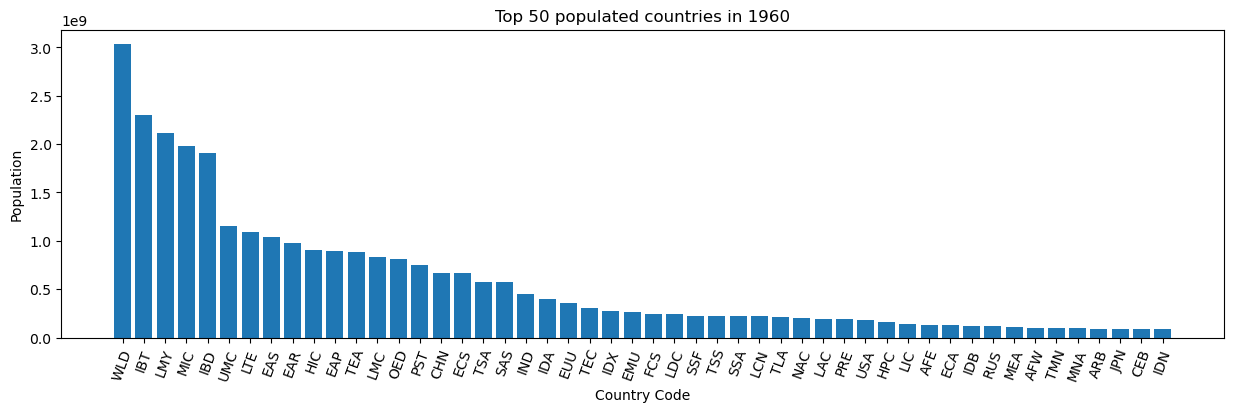

In [14]:
# filtering the data to select top 50 populated countries and sorting it 
filtered_data1 = final_data.sort_values(by = '1960', ascending = False, na_position = 'last')

# plotting the bar graph for population in 1960
fig = plt.figure(figsize = (15, 4))
plt.bar(filtered_data1['Country Code'].head(50), filtered_data1['1960'].head(50))

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Top 50 populated countries in 1960')
plt.xticks(rotation = 70) # rotating the labels for better readability and using country code instead of full names

plt.show()

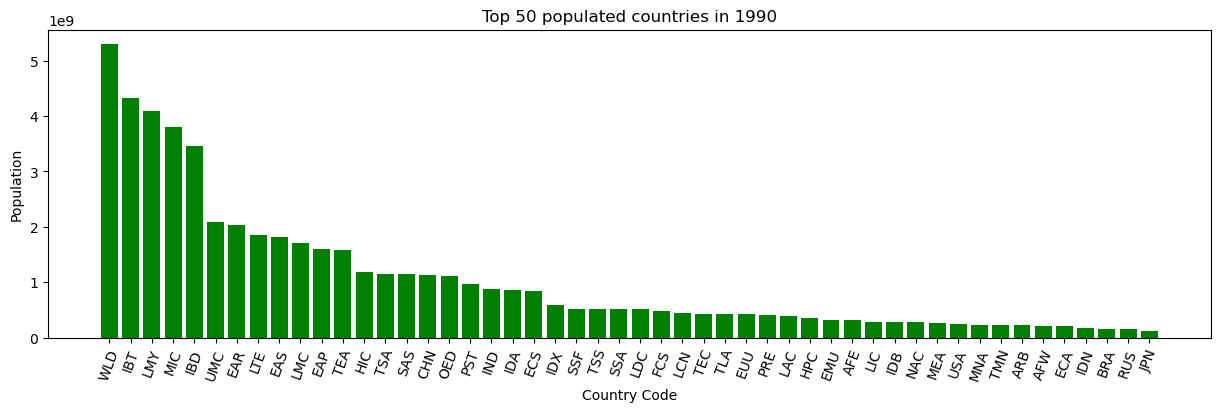

In [15]:
# sorting the data based on 1990
filtered_data2 = final_data.sort_values(by = '1990', ascending = False, na_position = 'last')

# plotting the bar graph for population in 1990
fig = plt.figure(figsize = (15, 4))
plt.bar(filtered_data2['Country Code'].head(50), filtered_data2['1990'].head(50), color = 'g')

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Top 50 populated countries in 1990')
plt.xticks(rotation = 70) # rotating the labels for better readability 

plt.show()

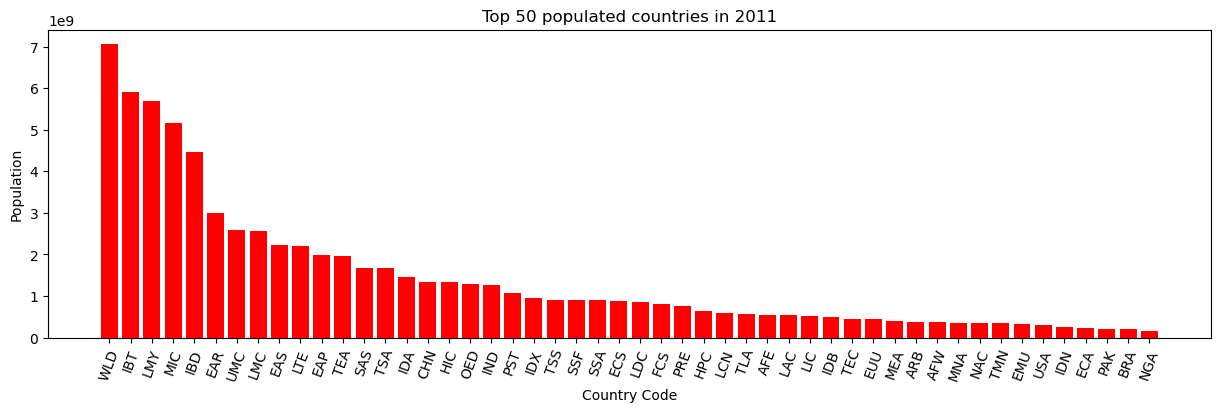

In [12]:
# Sorting the values based on 2011 
filtered_data3 = final_data.sort_values(by = '2011', ascending = False, na_position = 'last')

# plotting the bar graph for population in 2011
fig = plt.figure(figsize = (15, 4))
plt.bar(filtered_data3['Country Code'].head(50), filtered_data3['2011'].head(50), color = 'r')

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Top 50 populated countries in 2011')
plt.xticks(rotation = 70) # rotating the labels for better readability 

plt.show()

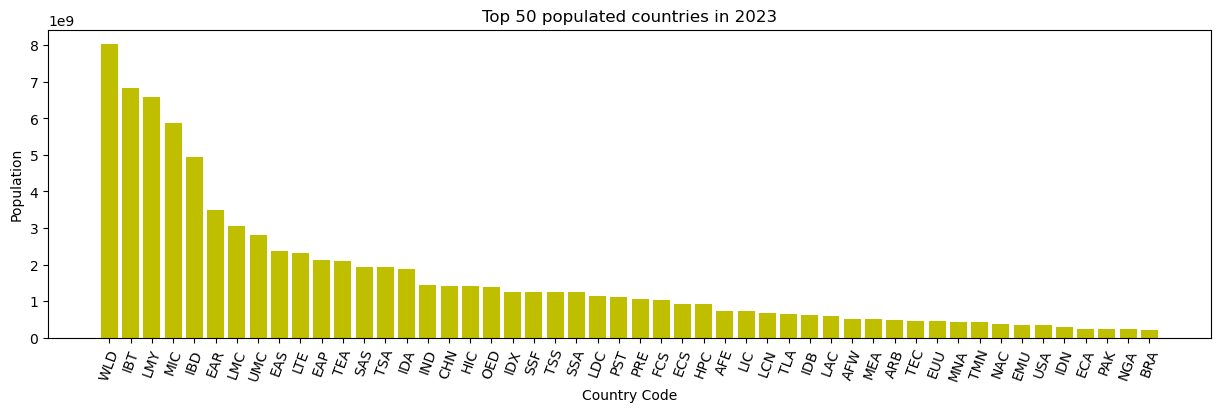

In [16]:
# Sorting the values based on 2023
filtered_data3 = final_data.sort_values(by = '2023', ascending = False, na_position = 'last')

# plotting the bar graph for population in 2011
fig = plt.figure(figsize = (15, 4))
plt.bar(filtered_data3['Country Code'].head(50), filtered_data3['2023'].head(50), color = 'y')

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Top 50 populated countries in 2023')
plt.xticks(rotation = 70) # rotating the labels for better readability 

plt.show()

In [17]:
# creating the dataframe of population grouped by income class
pop_class = pd.DataFrame(final_data.groupby('IncomeGroup')['2023'].sum())
pop_class

,2023
IncomeGroup,
High income,1.229374e+09
Low income,7.229841e+08
Lower middle income,3.229625e+09
Upper middle income,2.790802e+09


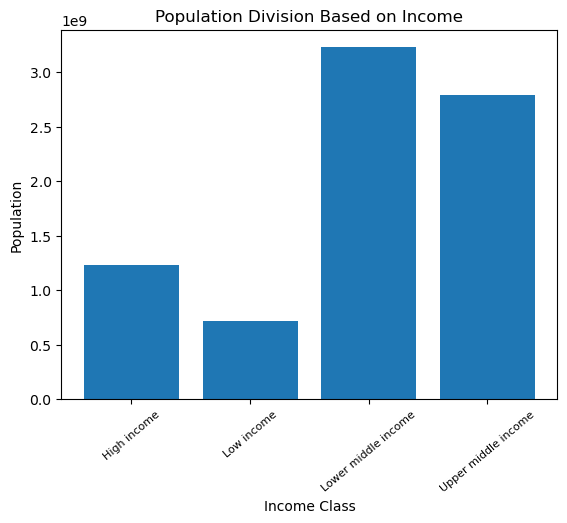

In [19]:
# we will create the bar graph of population ratio in different classes i.e. lower income, high income, etc
pop_class = pd.DataFrame(final_data.groupby('IncomeGroup')['2023'].sum())

#creating the bar graph for it 
plt.bar(pop_class.index, pop_class['2023'])

#setting labels
plt.xlabel('Income Class')
plt.ylabel('Population')
plt.xticks(rotation = 40, fontsize = 8)

#setting title
plt.title('Population Division Based on Income')

plt.show()

### Comparing the total population and gender ratio in different countries based on similar years

In [45]:
fe_data1 = pd.read_csv('API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_90136.csv')
fe_data2 = pd.read_csv('Metadata_Country_API_SP.POP.TOTL.FE.IN_DS2_en_csv_v2_90136.csv')
female_pop = pd.merge(fe_data1, fe_data2, on = 'Country Code', how = 'inner')
female_pop.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2019,2020,2021,2022,2023,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Population, female",SP.POP.TOTL.FE.IN,27773.0,28380.0,28820.0,29218.0,29570.0,29875.0,...,56254.0,56373.0,56330.0,56272.0,56225.0,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,"Population, female",SP.POP.TOTL.FE.IN,65853220.0,67606287.0,69457112.0,71375643.0,73386167.0,75478396.0,...,336930970.0,345889868.0,354855221.0,363834524.0,372985196.0,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,"Population, female",SP.POP.TOTL.FE.IN,4145945.0,4233771.0,4326881.0,4424511.0,4526691.0,4634341.0,...,18679089.0,19279930.0,19844584.0,20362329.0,20920159.0,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN


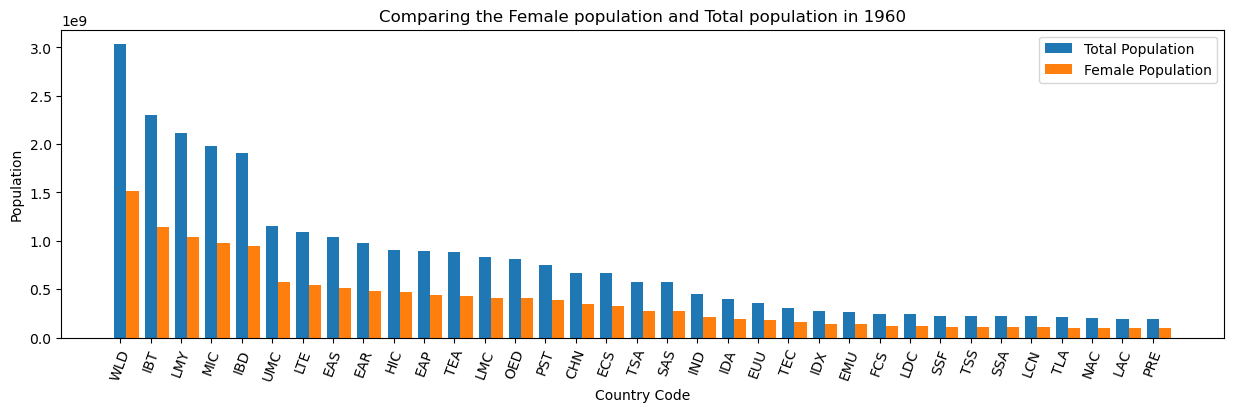

In [42]:
# Sorting the data to create the visualization of top populated countries
filtered_data1 = final_data.sort_values(by = '1960', ascending = False, na_position = 'last')
fefiltered_data1 = female_pop.sort_values(by = '1960', ascending = False, na_position = 'last')

# plotting the bar graph for population in 1960
fig = plt.figure(figsize = (15, 4))

#setting index to create a grouped bar chart
barwidth = 0.4
index = filtered_data1['Country Code'].head(35)
newindex = [i + barwidth for i in range(len(index))]


plt.bar(x = index, height = filtered_data1['1960'].head(35), label = 'Total Population', width = barwidth )
plt.bar(x = newindex, height = fefiltered_data1['1960'].head(35), label = 'Female Population', width = barwidth)

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Comparing the Female population and Total population in 1960')
plt.xticks(rotation = 70) # rotating the labels for better readability and using country code instead of full names

plt.legend()
plt.show()

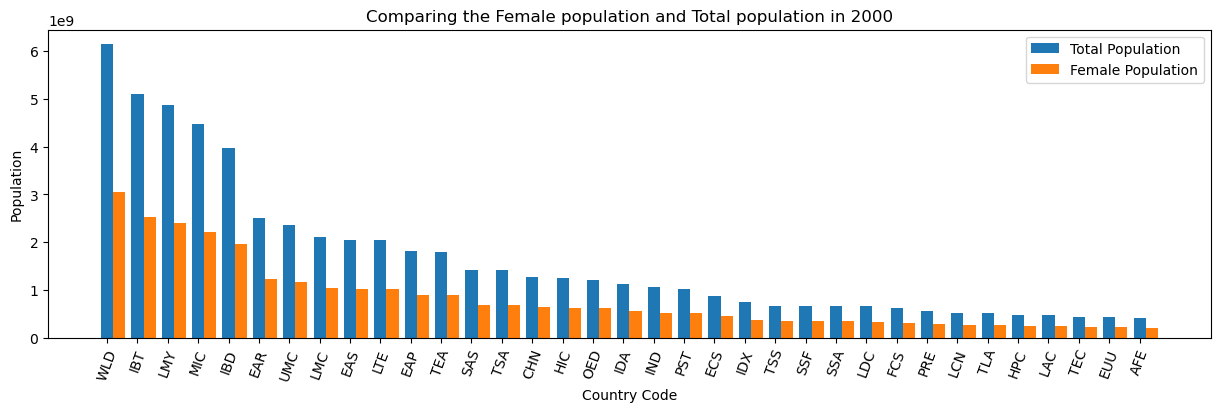

In [43]:
# Sorting the data to create the visualization of top populated countries
filtered_data1 = final_data.sort_values(by = '2000', ascending = False, na_position = 'last')
fefiltered_data1 = female_pop.sort_values(by = '2000', ascending = False, na_position = 'last')

# plotting the bar graph for population in 1960
fig = plt.figure(figsize = (15, 4))

#setting index to create a grouped bar chart
barwidth = 0.4
index = filtered_data1['Country Code'].head(35)
newindex = [i + barwidth for i in range(len(index))]


plt.bar(x = index, height = filtered_data1['2000'].head(35), label = 'Total Population', width = barwidth )
plt.bar(x = newindex, height = fefiltered_data1['2000'].head(35), label = 'Female Population', width = barwidth)

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Comparing the Female population and Total population in 2000')
plt.xticks(rotation = 70) # rotating the labels for better readability and using country code instead of full names

plt.legend()
plt.show()

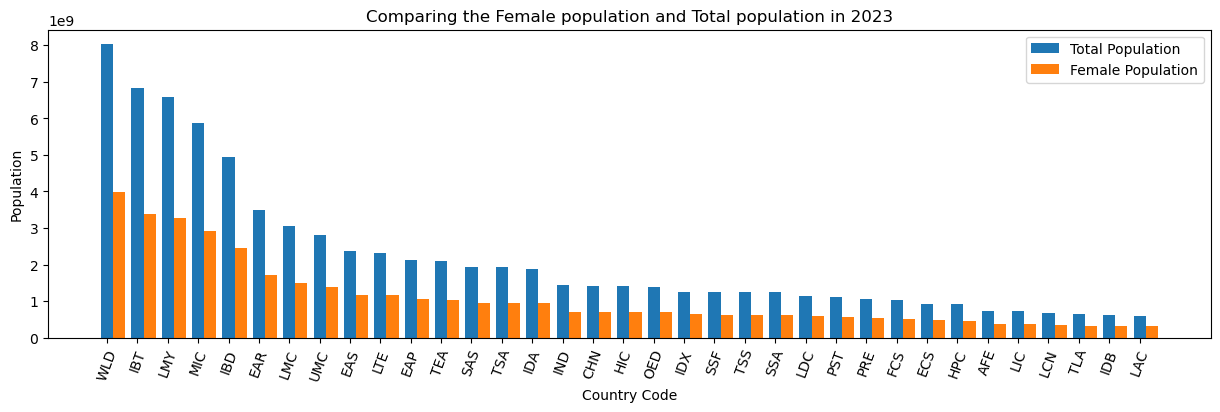

In [44]:
# Sorting the data to create the visualization of top populated countries
filtered_data1 = final_data.sort_values(by = '2023', ascending = False, na_position = 'last')
fefiltered_data1 = female_pop.sort_values(by = '2023', ascending = False, na_position = 'last')

# plotting the bar graph for population in 1960
fig = plt.figure(figsize = (15, 4))

#setting index to create a grouped bar chart
barwidth = 0.4
index = filtered_data1['Country Code'].head(35)
newindex = [i + barwidth for i in range(len(index))]


plt.bar(x = index, height = filtered_data1['2023'].head(35), label = 'Total Population', width = barwidth )
plt.bar(x = newindex, height = fefiltered_data1['2023'].head(35), label = 'Female Population', width = barwidth)

#setting labels
plt.xlabel('Country Code')
plt.ylabel('Population')
plt.title('Comparing the Female population and Total population in 2023')
plt.xticks(rotation = 70) # rotating the labels for better readability and using country code instead of full names

plt.legend()
plt.show()

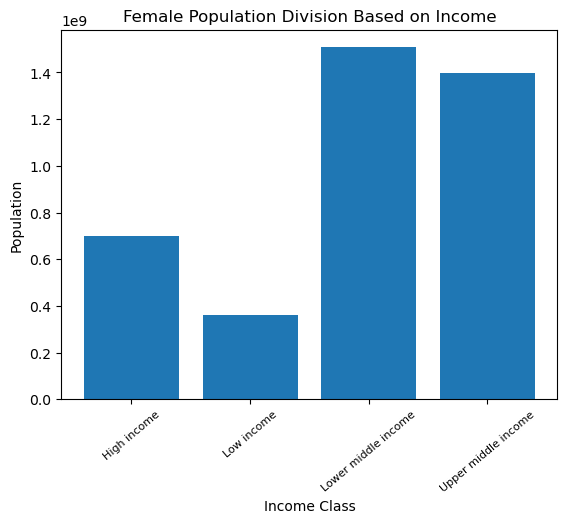

In [46]:
# we will create the bar graph of population ratio in different classes in the year 2023 i.e. lower income, high income, etc
fe_pop_class = pd.DataFrame(female_pop.groupby('IncomeGroup')['2023'].sum())

#creating the bar graph for it 
plt.bar(fe_pop_class.index, fe_pop_class['2023'])

#setting labels
plt.xlabel('Income Class')
plt.ylabel('Population')
plt.xticks(rotation = 40, fontsize = 8)

#setting title
plt.title('Female Population Division Based on Income')

plt.show()

# Thank You 